# vechicle coupon recommendation

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
data=pd.read_csv('in-vehicle-coupon-recommendation[1].csv')

In [5]:
df=pd.DataFrame(data)

# Preprocessing and EDA

In [7]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [9]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [13]:
#get the number of rows and columns in the dataframe
df.shape

(12684, 26)

In [17]:
#get the name of the columns in the dataframe
df.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [17]:
#display the datatype of each column
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

# checking missing values

In [19]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

 # found missing values and then it remove

In [21]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# checking duplicates

In [25]:
df.duplicated().sum()

0

In [29]:
# Here we can analyze wheather our data id balanced or not
target_value_count=df['Y'].value_counts()

In [31]:
target_value_count

Y
1    62
0    46
Name: count, dtype: int64

# This is slightly imbalanced which does not affect the model accuracy.

In [37]:
num_cols=df.select_dtypes(include=['number'])
num_cols

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,55,0,1,0,0,0,1,1
1238,80,0,1,0,0,0,1,0
1239,80,0,1,0,0,0,1,1
1240,80,0,1,1,0,0,1,0
1241,80,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...
8293,55,0,1,1,1,0,1,1
8294,55,0,1,1,1,0,1,1
8295,30,0,1,1,1,0,1,1
8296,30,0,1,1,1,0,1,1


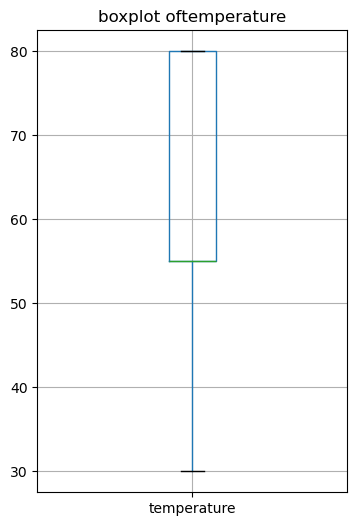

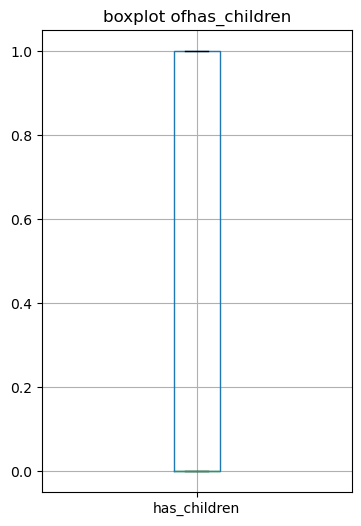

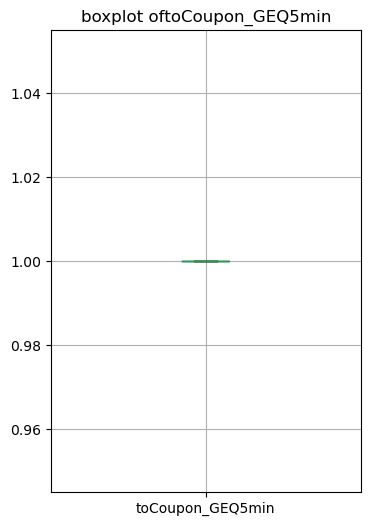

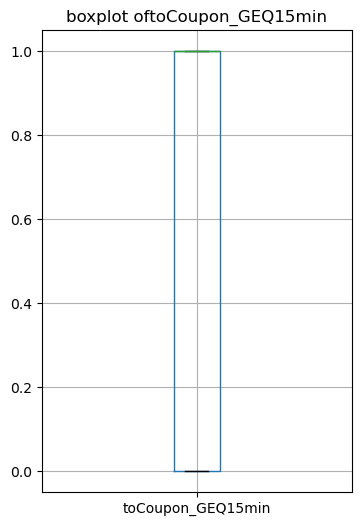

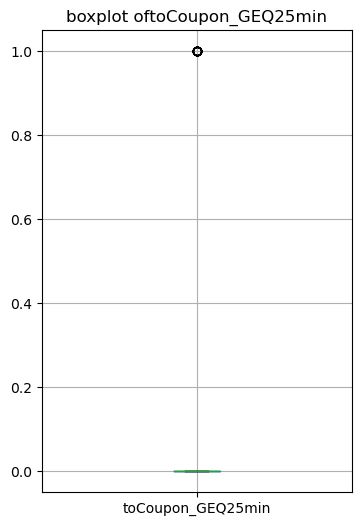

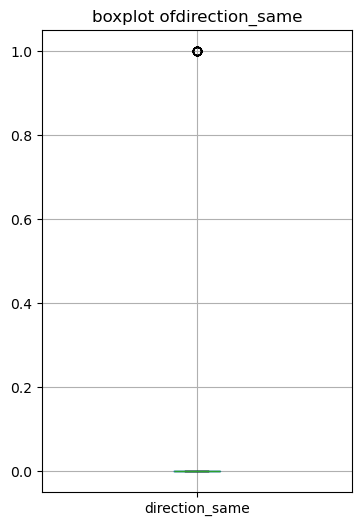

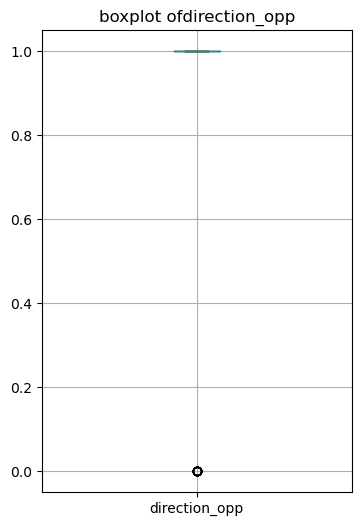

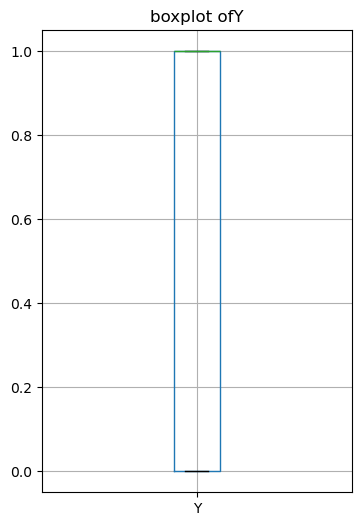

In [61]:
for column in num_cols.columns:
    plt.figure(figsize=(4,6))
    num_cols.boxplot(column=column)
    plt.title(f'boxplot of{column}')

<Axes: >

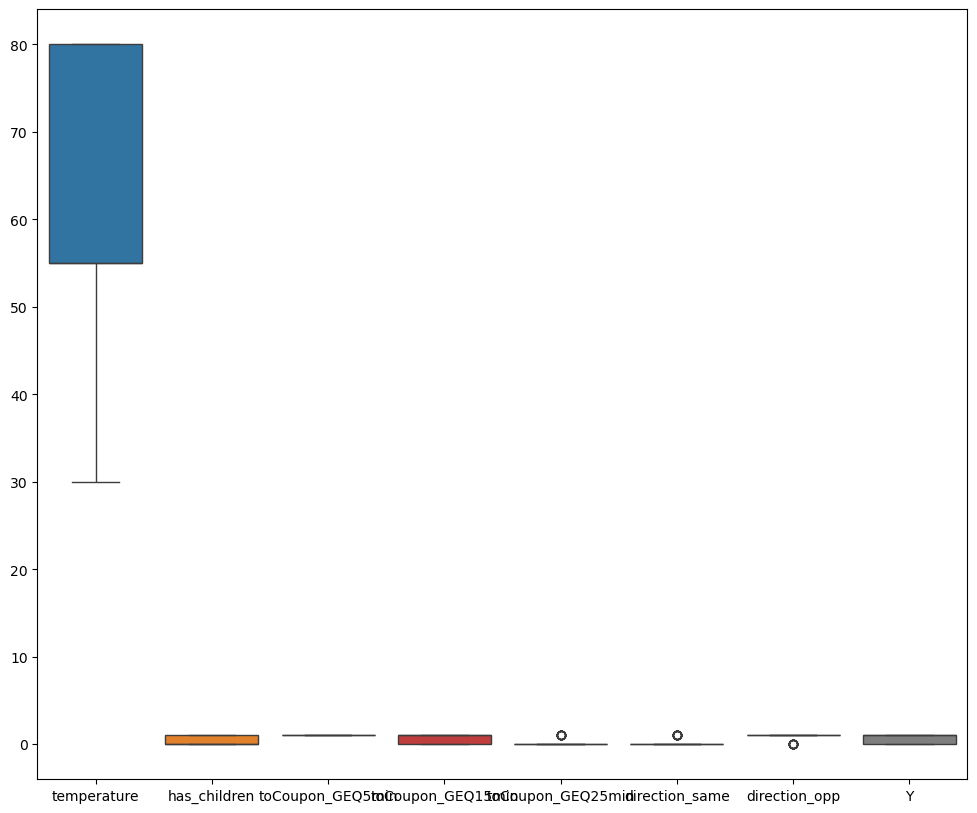

In [45]:
plt.figure(figsize=(12,10))
sns.boxplot(df)

In [7]:
def Handling_Outliers(df):
    for col in df.select_dtypes(include = ['int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #CAPPING OUTLIERS
        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [9]:
df1 = Handling_Outliers(df)

<Axes: >

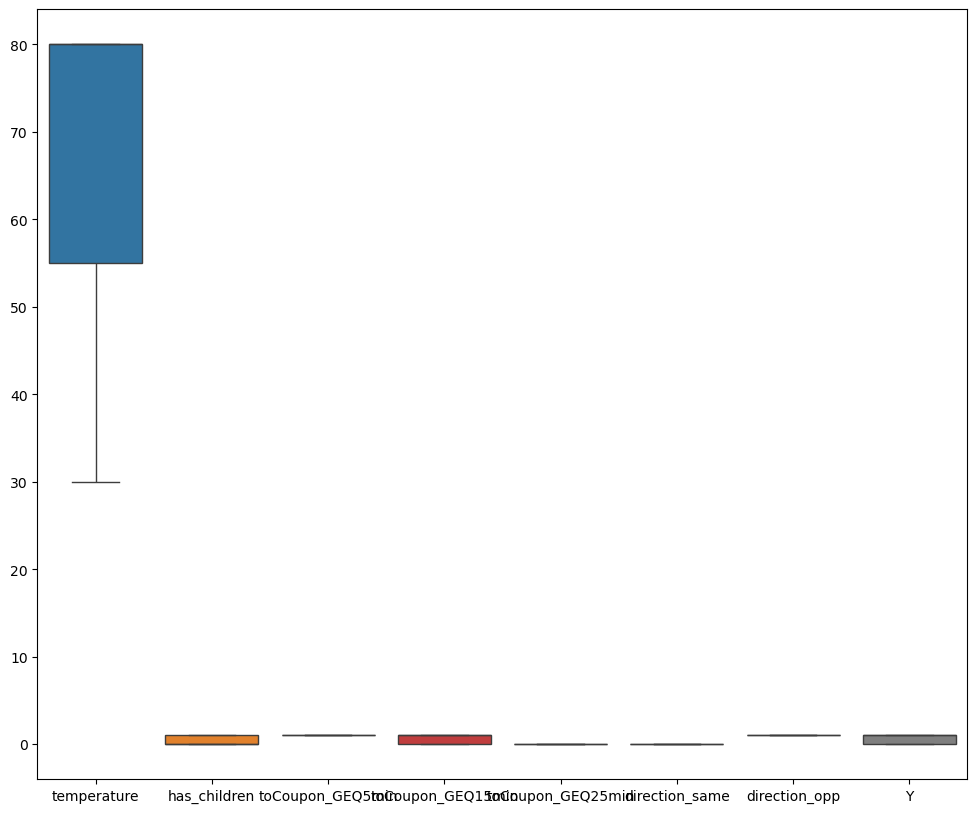

In [11]:
plt.figure(figsize = (12,10))
sns.boxplot(df1)

In [20]:
df1 = df1.drop(columns = ['destination', 'passanger', 'weather','time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus','education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

In [47]:
df1.columns

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [22]:
df1.skew()

temperature         -0.643390
has_children         0.348644
toCoupon_GEQ5min     0.000000
toCoupon_GEQ15min   -0.247890
toCoupon_GEQ25min    0.000000
direction_same       0.000000
direction_opp        0.000000
Y                   -0.276364
dtype: float64

In [24]:
correlation=df1.corr()
correlation

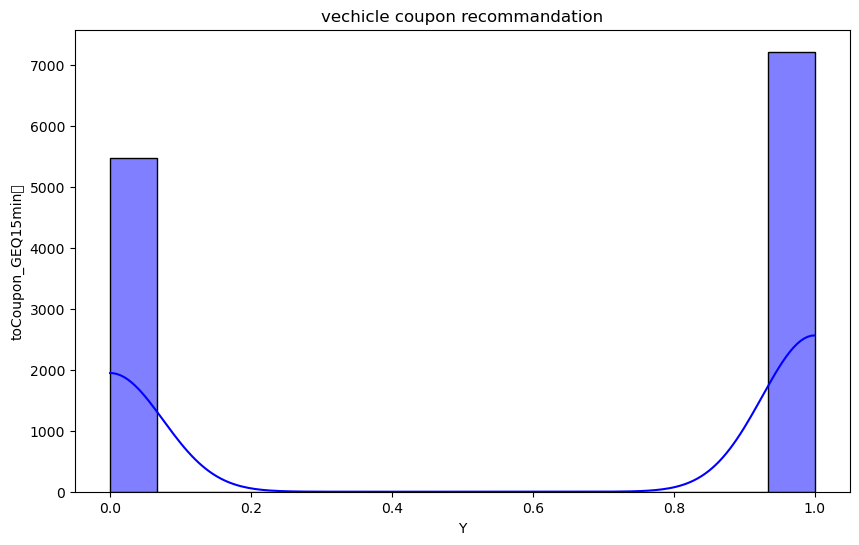

In [34]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Y'],bins=15,kde=True, color="blue")

# Labels and Title
plt.xlabel("Y")
plt.ylabel("toCoupon_GEQ15min	")
plt.title("vechicle coupon recommandation")

plt.show()

Text(0.5, 1.0, 'correlation of vechicle coupon recommendation')

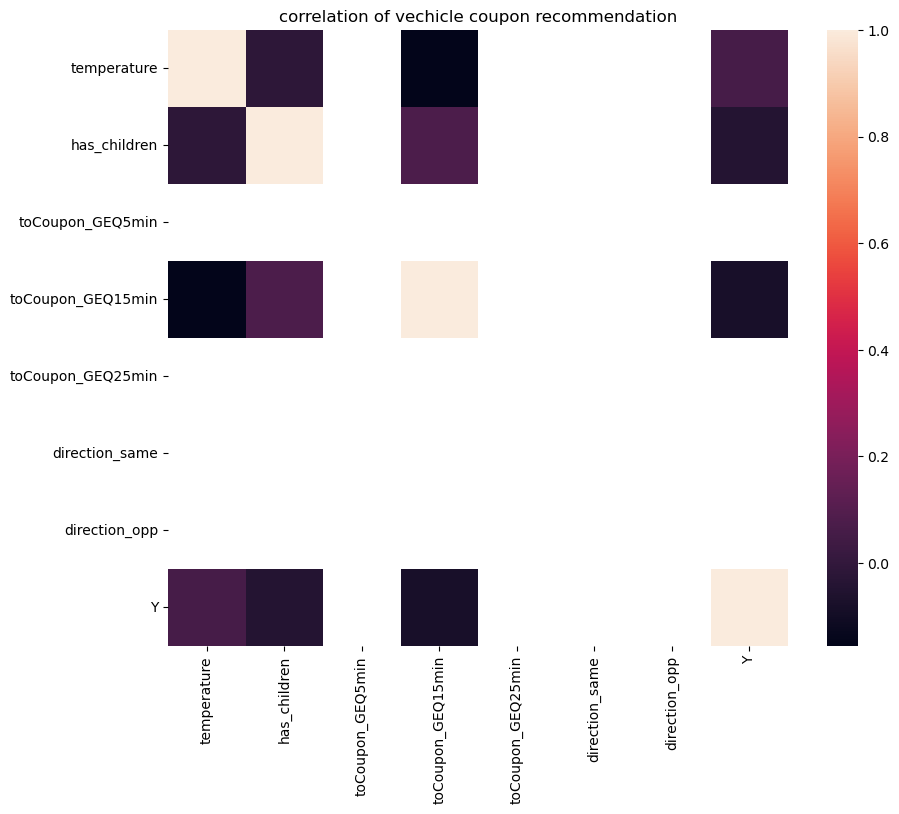

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation)
plt.title('correlation of vechicle coupon recommendation')

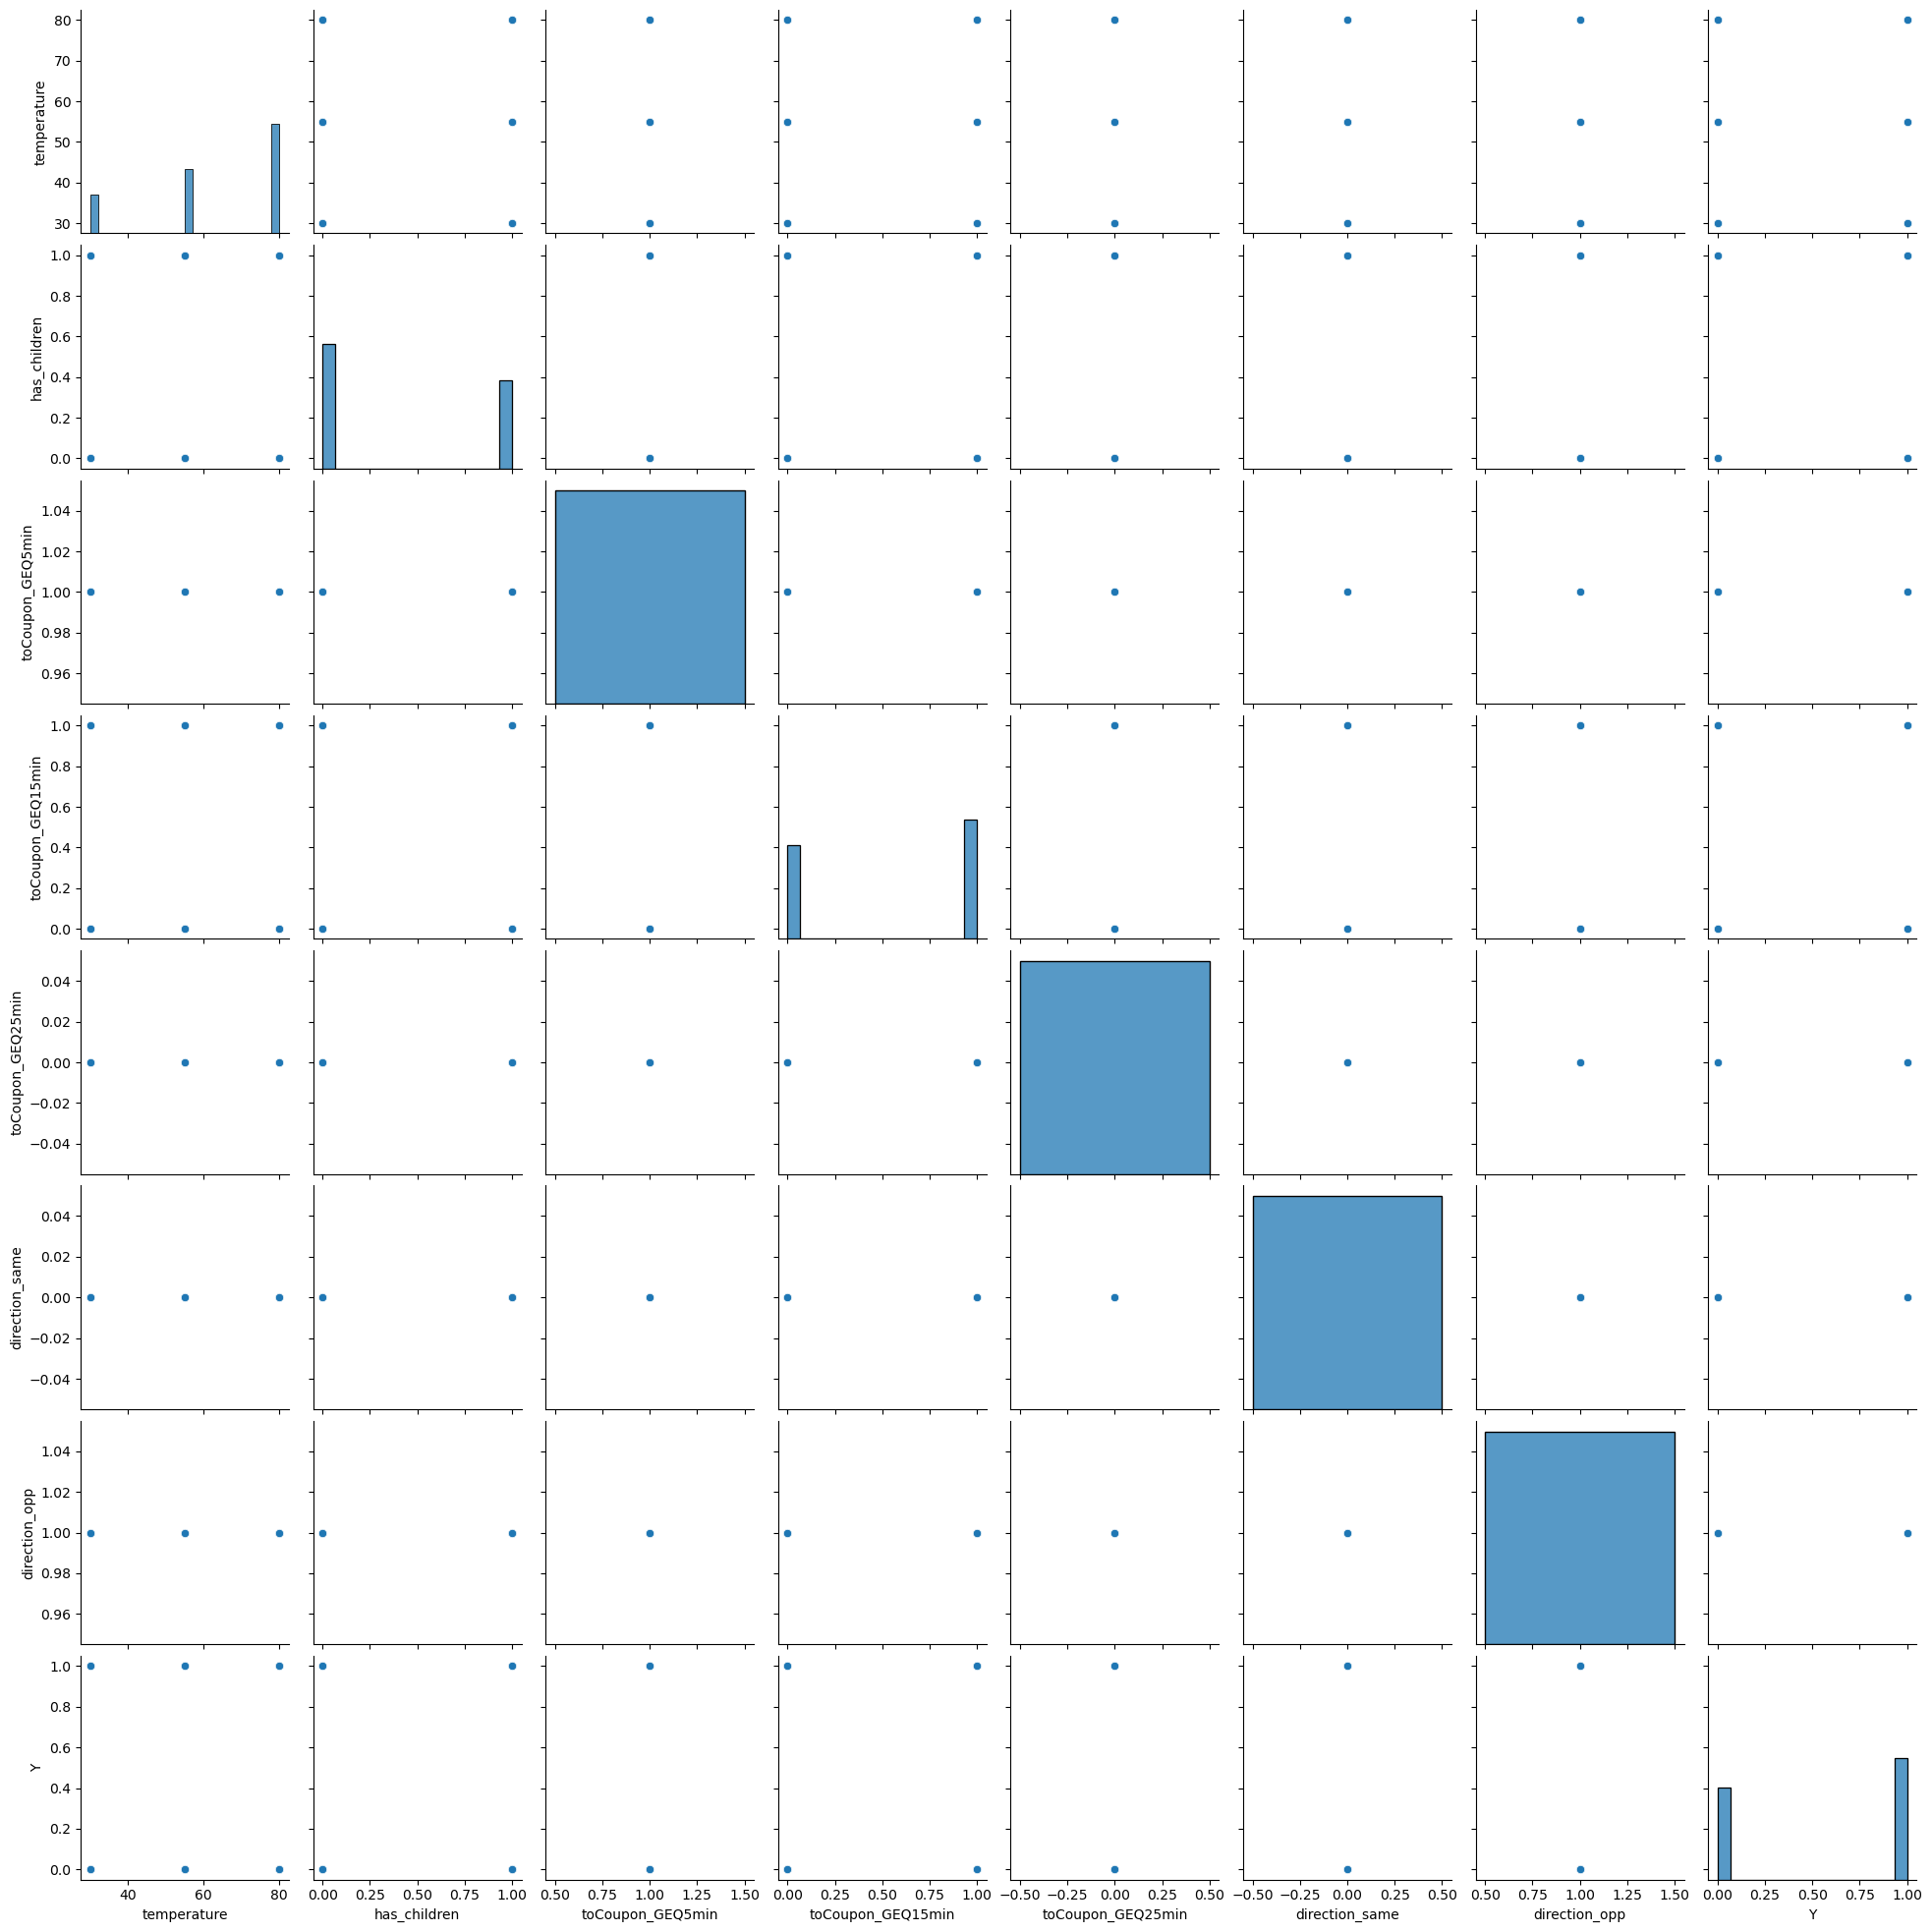

In [39]:
sns.pairplot(df1)
plt.show()


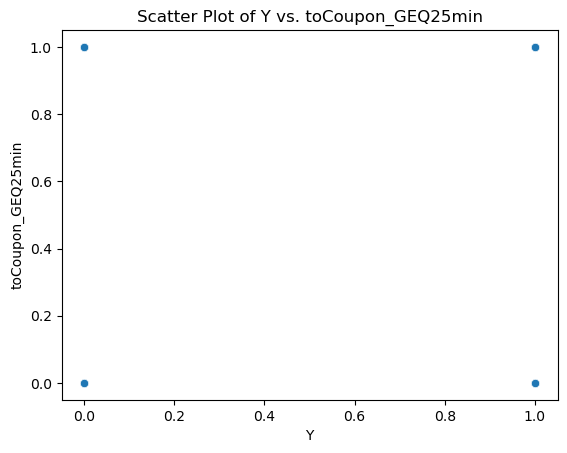

In [49]:
sns.scatterplot(data=data, x='Y', y='toCoupon_GEQ25min')
plt.title('Scatter Plot of Y vs. toCoupon_GEQ25min')
plt.xlabel('Y')
plt.ylabel('toCoupon_GEQ25min')

# Show the plot
plt.show()

In [51]:
X = df1.drop(['Y'], axis = 1)
y = df1['Y']

In [55]:
sk =  SelectKBest(score_func = f_classif, k = 10)
x_new = sk.fit_transform(X,y)
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)
print("selected_Fetaures:",selected_features)
print("\nFeature Score:")
print(feature_score)

selected_Fetaures: Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

Feature Score:
             feature      Score
3  toCoupon_GEQ15min  85.013147
0        temperature  47.741336
1       has_children  26.375653
2   toCoupon_GEQ5min        NaN
4  toCoupon_GEQ25min        NaN
5     direction_same        NaN
6      direction_opp        NaN


In [60]:
X_selected = X[selected_features]

In [62]:
X_selected.columns

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

In [64]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-0.43342979,  1.18937808,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87179896,  1.18937808,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87179896,  1.18937808,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.73865855, -0.84077554,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.73865855, -0.84077554,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87179896, -0.84077554,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state =42)

In [68]:
x_train.shape

(10147, 7)

In [70]:
x_test.shape

(2537, 7)

In [72]:
print(f""" 
X_train shape : {x_train.shape}
X_test shape : {x_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape} 
""")

 
X_train shape : (10147, 7)
X_test shape : (2537, 7)
y_train shape : (10147,)
y_test shape : (2537,) 

